In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN
from matplotlib import cm
%matplotlib inline

In [33]:
df = pd.read_csv('Housing_price.csv')
df.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


In [34]:
df.drop(['location','size'],1,inplace=True)

In [35]:
df.isna().sum()

total_sqft        0
bath              0
price             0
bhk               0
price_per_sqft    0
dtype: int64

In [36]:
df

,total_sqft,bath,price,bhk,price_per_sqft
0,1056.0,2.0,39.07,2,3699
1,2600.0,5.0,120.00,4,4615
2,1440.0,2.0,62.00,3,4305
3,1521.0,3.0,95.00,3,6245
4,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...
13195,3453.0,4.0,231.00,5,6689
13196,3600.0,5.0,400.00,4,11111
13197,1141.0,2.0,60.00,2,5258
13198,4689.0,4.0,488.00,4,10407


In [37]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() 
df1 = scaler.fit_transform(df)
df2 = pd.DataFrame(df1, columns = df.columns)

In [38]:
df2

,total_sqft,bath,price,bhk,price_per_sqft
0,0.020183,0.025641,0.008650,0.023810,0.000286
1,0.049722,0.102564,0.031180,0.071429,0.000362
2,0.027530,0.025641,0.015033,0.047619,0.000337
3,0.029079,0.051282,0.024220,0.047619,0.000498
4,0.022938,0.025641,0.011971,0.023810,0.000332
...,...,...,...,...,...
13195,0.066040,0.076923,0.062082,0.095238,0.000535
13196,0.068853,0.102564,0.109131,0.071429,0.000904
13197,0.021809,0.025641,0.014477,0.023810,0.000416
13198,0.089686,0.076923,0.133630,0.071429,0.000845


In [52]:
outlier_detection = DBSCAN(eps = .2, metric='euclidean', min_samples = 5, n_jobs = -1)
clusters = outlier_detection.fit_predict(df2)

In [53]:
np.unique(clusters, return_counts=True)

(array([-1,  0], dtype=int64), array([   10, 13190], dtype=int64))

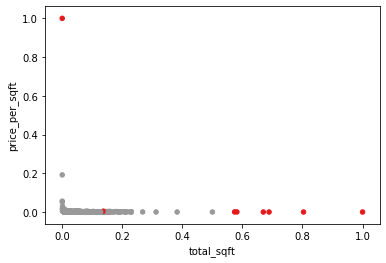

In [54]:
cmap = cm.get_cmap('Set1')
df2.plot.scatter(x='total_sqft',y='price_per_sqft', c=clusters, cmap=cmap,
 colorbar = False)

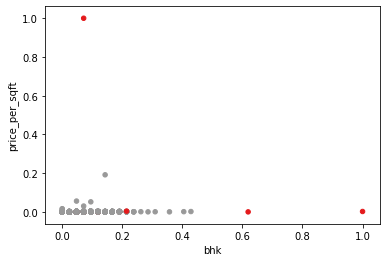

In [55]:
df2.plot.scatter(x='bhk',y='price_per_sqft', c=clusters, cmap=cmap,
 colorbar = False)